In [1]:
import tensorflow as tf

In [2]:
import matplotlib

In [3]:
hello = tf.constant("Hey!!!")
sess = tf.Session()
print(sess.run(hello))

Hey!!!


In [4]:
import numpy as np
%matplotlib inline
import pylab

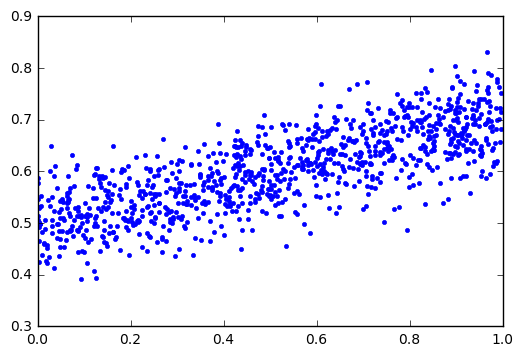

In [5]:
xdata = np.random.rand(1000).astype(np.float32) #numpy array of 1000 floats
noise = np.random.normal(scale=0.05, size=len(xdata)) #points from a normal distribution with standard deviation(scale) & size as no. of instances
ydata = xdata * 0.2 + 0.5 + noise #noise represents the bias
pylab.plot(xdata, ydata, '.')

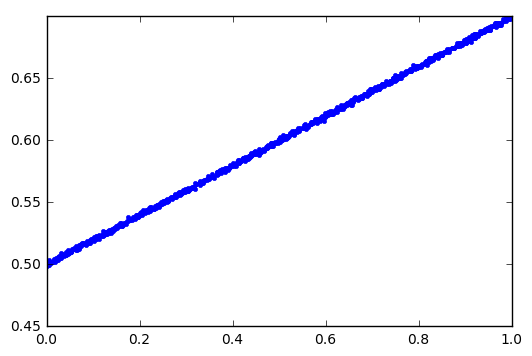

In [6]:
noise = np.random.normal(scale=0.001, size=len(xdata))
ydata = xdata * 0.2 + 0.5 + noise #less noise => better results
pylab.plot(xdata, ydata, '.')

In [7]:
Wt = tf.Variable(tf.random_uniform([1],0.0,1.0))
b = tf.Variable(tf.zeros([1]))
y = Wt * xdata + b

print(Wt)
print(b)

In [8]:
loss = tf.reduce_mean(tf.square(y - ydata))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
print(init)

('loss:', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
('optimizer:', <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fa0d89cfa10>)
('train:', <tensorflow.python.framework.ops.Operation object at 0x7fa0d86a7d50>)
name: "init"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"



In [9]:
print(tf.get_default_graph().as_graph_def()) #Our Neural Net

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_STRING
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_STRING
        tensor_shape {
        }
        string_val: "Hey!!!"
      }
    }
  }
}
node {
  name: "random_uniform/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 1
          }
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "random_uniform/min"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "random_uniform/max"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value

In [10]:
sess = tf.Session()
sess.run(init)
y_ini = sess.run(y) #copy initial value of y for future reference

print(sess.run([Wt, b])) #Initial values of Wt nd b

[array([ 0.01869512], dtype=float32), array([ 0.], dtype=float32)]


In [11]:

for step in range(201):
    sess.run(train) #Training
    if step % 20 == 0:
        print(step, sess.run([Wt,b]))
        
print(sess.run([Wt,b]))

(0, [array([ 0.34184718], dtype=float32), array([ 0.59390312], dtype=float32)])
(20, [array([ 0.21731676], dtype=float32), array([ 0.49037328], dtype=float32)])
(40, [array([ 0.20434211], dtype=float32), array([ 0.49757257], dtype=float32)])
(60, [array([ 0.20106013], dtype=float32), array([ 0.49939364], dtype=float32)])
(80, [array([ 0.20022991], dtype=float32), array([ 0.4998543], dtype=float32)])
(100, [array([ 0.20001991], dtype=float32), array([ 0.49997082], dtype=float32)])
(120, [array([ 0.19996679], dtype=float32), array([ 0.5000003], dtype=float32)])
(140, [array([ 0.19995336], dtype=float32), array([ 0.50000775], dtype=float32)])
(160, [array([ 0.19994998], dtype=float32), array([ 0.5000096], dtype=float32)])
(180, [array([ 0.19994913], dtype=float32), array([ 0.50001013], dtype=float32)])
(200, [array([ 0.19994904], dtype=float32), array([ 0.50001013], dtype=float32)])
[array([ 0.19994904], dtype=float32), array([ 0.50001013], dtype=float32)]


(0, 1.0)

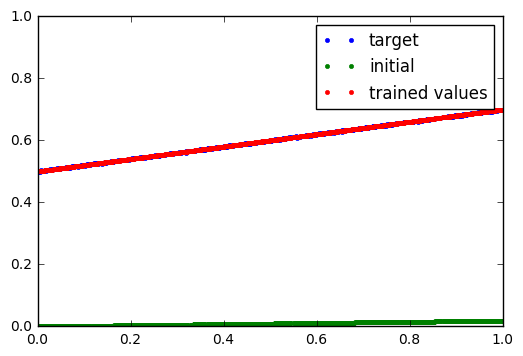

In [12]:
pylab.plot(xdata, ydata, '.', label = "target")
pylab.plot(xdata, y_ini, '.', label = "initial")
pylab.plot(xdata, sess.run(y), '.', label = "trained values")
pylab.legend()
pylab.ylim(0, 1.0)